In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns

                    # A   R   N   D   C   Q   E   G   H   I   L   K   M   F   P   S   T   W   Y   V
blosum50 = np.array(
                     [5, -2, -1, -2, -1, -1, -1,  0, -2, -1, -2, -1, -1, -3, -1,  1,  0, -3, -2,  0,   # A
                     -2,  7, -1, -2, -4,  1,  0, -3,  0, -4, -3,  3, -2, -3, -3, -1, -1, -3, -1, -3,   # R
                     -1, -1,  7,  2, -2,  0,  0,  0,  1, -3, -4,  0, -2, -4, -2,  1,  0, -4, -2, -3,   # N
                     -2, -2,  2,  8, -4,  0,  2, -1, -1, -4, -4, -1, -4, -5, -1,  0, -1, -5, -3, -4,   # D
                     -1, -4, -2, -4, 13, -3, -3, -3, -3, -2, -2, -3, -2, -2, -4, -1, -1, -5, -3, -1,   # C
                     -1,  1,  0,  0, -3,  7,  2, -2,  1, -3, -2,  2,  0, -4, -1,  0, -1, -1, -1, -3,   # Q
                     -1,  0,  0,  2, -3,  2,  6, -3,  0, -4, -3,  1, -2, -3, -1, -1, -1, -3, -2, -3,   # E
                      0, -3,  0, -1, -3, -2, -3,  8, -2, -4, -4, -2, -3, -4, -2,  0, -2, -3, -3, -4,   # G
                     -2,  0,  1, -1, -3,  1,  0, -2, 10, -4, -3,  0, -1, -1, -2, -1, -2, -3,  2, -4,   # H
                     -1, -4, -3, -4, -2, -3, -4, -4, -4,  5,  2, -3,  2,  0, -3, -3, -1, -3, -1,  4,   # I
                     -2, -3, -4, -4, -2, -2, -3, -4, -3,  2,  5, -3,  3,  1, -4, -3, -1, -2, -1,  1,   # L
                     -1,  3,  0, -1, -3,  2,  1, -2,  0, -3, -3,  6, -2, -4, -1,  0, -1, -3, -2, -3,   # K
                     -1, -2, -2, -4, -2,  0, -2, -3, -1,  2,  3, -2,  7,  0, -3, -2, -1, -1,  0,  1,   # M
                     -3, -3, -4, -5, -2, -4, -3, -4, -1,  0,  1, -4,  0,  8, -4, -3, -2,  1,  4, -1,   # F
                     -1, -3, -2, -1, -4, -1, -1, -2, -2, -3, -4, -1, -3, -4, 10, -1, -1, -4, -3, -3,   # P
                      1, -1,  1,  0, -1,  0, -1,  0, -1, -3, -3,  0, -2, -3, -1,  5,  2, -4, -2, -2,   # S
                      0, -1,  0, -1, -1, -1, -1, -2, -2, -1, -1, -1, -1, -2, -1,  2,  5, -3, -2,  0,   # T
                     -3, -3, -4, -5, -5, -1, -3, -3, -3, -3, -2, -3, -1,  1, -4, -4, -3, 15,  2, -3,   # W
                     -2, -1, -2, -3, -3, -1, -2, -3,  2, -1, -1, -2,  0,  4, -3, -2, -2,  2,  8, -1,   # Y
                      0, -3, -3, -4, -1, -3, -3, -4, -4,  4,  1, -3,  1, -1, -3, -2,  0, -3, -1,  5,]) # V

blosum50_seq = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V']
blosum50 = np.reshape(blosum50, (20,20))

def blosum50Get(c1, c2):
    if c1 in blosum50_seq and c2 in blosum50_seq:
        return blosum50[blosum50_seq.index(c1),blosum50_seq.index(c2)]

In [154]:
def nwSequenceMatching(s1, s2):
    if isinstance(s1, str) and isinstance(s2, str):
        s1 = ' ' + s1
        s2 = ' ' + s2
        
        l1 = list(s1)
        l2 = list(s2)
        
        workArray = np.zeros([len(l1),len(l2)])
        
        for i in range(len(l1)):
            for j in range(len(l2)):
                workArray[i,j] = nwFunction(l1,l2,i,j,workArray)
                    
        
        
        print(nwMatching(l1,l2,workArray))

    
def nwFunction(l1, l2, i, j, array):
    
    if i-1 < 0 and j-1 < 0:
        return 0
    elif (i-1) < 0:
        return array[i, j-1] - 8
    elif j-1 < 0:
        return array[i-1, j] - 8
    else:
        values = [  array[i-1,j-1] + blosum50Get(l1[i],l2[j]), 
                    array[i-1,j] - 8, 
                    array[i,j-1] - 8]
        
        return max(values)
    
def nwMatching(l1,l2,array):
    
    i, j = array.shape
    
    i = i-1
    j = j-1
    
    string1 = ''
    string2 = ''
    
    while True:
        
        if i-1 < 0 and j-1 < 0:
            return (string1, string2)
        elif (i-1) < 0:
            string1 = '-' + string1
            string2 = l2[j] + string2
            j = j-1
        elif j-1 < 0:
            string1 = l1[i] + string1
            string2 = ' '+ string2
            i = i-1
        else:
            values = [  array[i-1,j-1] + blosum50Get(l1[i],l2[j]), 
                        array[i-1,j] - 8, 
                        array[i,j-1] - 8]
        
            transform = values.index(array[i,j])
            
            if transform == 0:
                string1 = l1[i] + string1
                string2 = l2[j] + string2
                i = i-1
                j = j-1
            elif transform == 1:
                string1 = l1[i] + string1
                string2 = '-' + string2
                i = i-1
            else:
                string1 = '-' + string1
                string2 = l2[j] + string2
                j = j-1
                
        
    

In [157]:
String_A = 'HEAGAWGHEE'
String_B = 'PAWHEAE'

nwSequenceMatching(String_A, String_B)
nwSequenceMatching('SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL','PSPTMEAVTSVEASTASHPHSTSSYFATTYYHLY')

('HEAGAWGHE-E', '  P-AW-HEAE')
('-SALPQPTTPVSSFTSGSMLGRTDTALTNTYSAL-', 'PSPTMEAVTSVEA-STASHPHSTSSYFATTYYHLY')


In [159]:
def swSequenceMatching(s1, s2):
    if isinstance(s1, str) and isinstance(s2, str):
        s1 = ' ' + s1
        s2 = ' ' + s2
        
        l1 = list(s1)
        l2 = list(s2)
        
        workArray = np.zeros([len(l1),len(l2)])
        
        for i in range(len(l1)):
            for j in range(len(l2)):
                workArray[i,j] = swFunction(l1,l2,i,j,workArray)
                    
        
        
        print(swMatching(l1,l2,workArray))

    
def swFunction(l1, l2, i, j, array):
    
    if i-1 < 0 and j-1 < 0:
        return 0
    elif (i-1) < 0:
        if array[i, j-1] - 8 > 0:
            return array[i,j-1] - 8
        else: 
            return 0
    elif j-1 < 0:
        if array[i, j-1] - 8 > 0:
            return array[i-1,j] - 8
        else: 
            return 0
    else:
        values = [  0,
                    array[i-1,j-1] + blosum50Get(l1[i],l2[j]), 
                    array[i-1,j] - 8, 
                    array[i,j-1] - 8]
        
        return max(values)
    
def swMatching(l1,l2,array):
    
    i,j = np.unravel_index(np.argmax(array, axis=None), array.shape)
            
    
    string1 = ''
    string2 = ''
    
    while True:
        
        if i-1 < 0 and j-1 < 0:
            return (string1, string2)
        elif (i-1) < 0:
            string1 = '-' + string1
            string2 = l2[j] + string2
            j = j-1
            if array[i,j] == 0:
                return(string1, string2)
            
        elif j-1 < 0:
            string1 = l1[i] + string1
            string2 = ' '+ string2
            i = i-1
            if array[i,j] == 0:
                return(string1, string2)
        else:
            values = [  array[i-1,j-1] + blosum50Get(l1[i],l2[j]), 
                        array[i-1,j] - 8, 
                        array[i,j-1] - 8]
        
            transform = values.index(array[i,j])
            
            if transform == 0:
                string1 = l1[i] + string1
                string2 = l2[j] + string2
                i = i-1
                j = j-1
            elif transform == 1:
                string1 = l1[i] + string1
                string2 = '-' + string2
                i = i-1
            else:
                string1 = '-' + string1
                string2 = l2[j] + string2
                j = j-1
                
            
            if array[i,j] == 0:
                return(string1, string2)
                
        
    

In [162]:
String_A = 'HEAGAWGHEE'
String_B = 'PAWHEAE'

swSequenceMatching(String_A, String_B)
swSequenceMatching('MQNSHSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRILQVSNGCVSKILGRY', 'TDDECHSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI')

('AWGHE', 'AW-HE')
('HSGVNQLGGVFVNGRPLPDSTRQKIVELAHSGARPCDISRI', 'HSGVNQLGGVFVGGRPLPDSTRQKIVELAHSGARPCDISRI')


Testing of blast algorithm using the Pax6 protein: P63015 for the mouse and eyeless protein: O96791 for the fruit fly.

The number of overall matches between the two seperate proteins was quite low, however there was an areas of intreast on the Pax6 protein that had high levels of matching with the 096791 protein. At the very beginning of the protein there was a high concentration of matches between the two suggesting a very distant common acensestor. However due to the high amount of differences in the rest of the protein this ancestor would have to be very far up the evolution tree. 

This is also only one piece of evidence towards such a hypothesis as this section of protein may just be a coincedence and fails to prove anything by itself.

In [163]:
#HMM algo

import random

def hmmGenerator(maxLength):
    
    startState = random.randint(0,5)
    stateString = ''
    resultString = ''
    
    if startState < 2:
        return cgRichState([],stateString,resultString,maxLength)
    else:
        return atRichState([],stateString,resultString,maxLength)
    
def atRichState(lengthList, stateString, resultString, maxLength):
    
    while True:
        
        stateString = stateString + 'a'
        
        stateValue = random.randint(0,10000)
        resultValue = random.randint(0,10000)
        
        if resultValue < 2698:
            resultString = resultString + 'A'
        elif resultValue < 2698+3237:
            resultString = resultString + 'T'
        elif resultValue < 2698+3237+2080:
            resultString = resultString + 'C'
        else:
            resultString = resultString + 'G'
            
        if len(resultString) == maxLength:
            lengthList = lengthList + [('AT Rich', len(resultString))]
            return (lengthList, stateString, resultString)
        
        if stateValue < 2:
            lengthList = lengthList + [('AT Rich', len(resultString))]
            return cgRichState(lengthList, stateString, resultString, maxLength)
            
        
    
    
def cgRichState(lengthList, stateString, resultString, maxLength):
    
        while True:
        
            stateString = stateString + 'c'

            stateValue = random.randint(0,10000)
            resultValue = random.randint(0,10000)

            if resultValue < 2459:
                resultString = resultString + 'A'
            elif resultValue < 2459+2079:
                resultString = resultString + 'T'
            elif resultValue < 2459+2079+2478:
                resultString = resultString + 'C'
            else:
                resultString = resultString + 'G'

            if len(resultString) == maxLength:
                lengthList = lengthList + [('CG Rich', len(resultString))]
                return (lengthList, stateString, resultString)

            if stateValue < 3:
                lengthList = lengthList + [('CG Rich', len(resultString))]
                return atRichState(lengthList, stateString, resultString, maxLength)

In [164]:

def viterbi(dna_string):
    array = np.zeros([len(dna_string), 2])
    print(array.shape)
    for i in range(len(dna_string)):
        if i == 0:
            array[i,0] = np.log(3/5) + emmissionLogProbability(dna_string[i], 'AT')
            array[i,1] = np.log(2/5) + emmissionLogProbability(dna_string[i], 'CG')
        else:
            jStates = list(array[i-1])
            atStateTrans = [jStates[0] + transmissionLogProbability('AT','AT'),  jStates[1] + transmissionLogProbability('CG','AT')]
            cgStateTrans = [jStates[0] + transmissionLogProbability('AT','CG'),  jStates[1] + transmissionLogProbability('CG','CG')]
            
            array[i,0] = max(atStateTrans) + emmissionLogProbability(dna_string[i], 'AT')
            
            
            array[i,1] = max(cgStateTrans) + emmissionLogProbability(dna_string[i], 'AT')
    
    
    if array[len(dna_string) - 1, 0] > array[len(dna_string) - 1, 1]:
        currentProb = array[len(dna_string) - 1, 0]
        currentState = 'AT'
    else:
        currentProb = array[len(dna_string) - 1, 1]
        currentState = 'CG'
    
    l = len(dna_string) - 1
    
    regionString = '' 
    
    while(True):
        
        if 'AT' in currentState:
            regionString = regionString + 'A'
        else:
            regionString = regionString + 'C'
        
        if l - 1 < 0:
            return regionString
        
        jStates = list(array[l-1])
        character = dna_string[l]
        
        probBefEmission = currentProb - emmissionLogProbability(character, currentState)
        
        if jStates[0] + transmissionLogProbability('AT', currentState) == probBefEmission:
            currentState = 'AT'
            currentProb = jStates[0]
        else:
            currentState = 'CG'
            currentProb = jStates[1]
        
        l = l - 1
        
    
    
def emmissionLogProbability(character, state):
    if 'AT' in state:
        if 'A' in character:
            return np.log(0.2698)
        elif 'T' in character:
            return np.log(0.3237)
        elif 'C' in character:
            return np.log(0.2080)
        elif 'G' in character:
            return np.log(0.1985)
    elif 'CG' in state:
        if 'A' in character:
            return np.log(0.2459)
        elif 'T' in character:
            return np.log(0.2079)
        elif 'C' in character:
            return np.log(0.2478)
        elif 'G' in character:
            return np.log(0.2984)
        
def transmissionLogProbability(state1, state2):
    if 'AT' in state1:
        if 'AT' in state2:
            return np.log(0.9998)
        elif 'CG' in state2:
            return np.log(0.0002)
    elif 'CG' in state1:
        if 'AT' in state2:
            return np.log(0.0003)
        elif 'CG' in state2:
            return np.log(0.9997)
        
    else:
        return 0

def convertToLineData(stateString):
    lengthList = range(len(stateString))
    stateList = []
    
    for x in range(len(stateString)):
        if 'A' in stateString[x]:
            stateList = stateList + [0]
        else:
            stateList = stateList + [1]
    
    return (lengthList, stateList)

[('AT Rich', 125), ('CG Rich', 4263), ('AT Rich', 6883), ('CG Rich', 7043), ('AT Rich', 10000)]
(10000, 2)


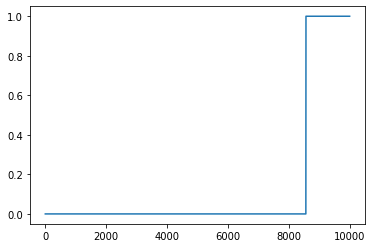

In [166]:
lengthList, stateString, resultString = hmmGenerator(10000)
print(lengthList);
l, s = convertToLineData(viterbi(resultString))

plt.plot(l,s)

(48502, 2)


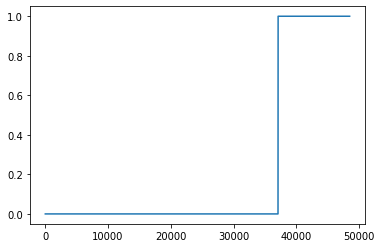

In [150]:
with open('phaseLambda.txt', 'r') as file:
    data = file.read().replace('\n', '')
    
l, s = convertToLineData(viterbi(data))

plt.plot(l,s)